# Newton-Kantorovich 型定理を利用した有限次元非線形方程式の精度保証付き数値解法

Newton-Kantorovich型定理は[Newton-Kantorovichの定理](https://ja.wikipedia.org/wiki/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%88%E3%83%B3%EF%BC%9D%E3%82%AB%E3%83%B3%E3%83%88%E3%83%AD%E3%83%93%E3%83%83%E3%83%81%E3%81%AE%E5%AE%9A%E7%90%86)を精度保証付き数値計算用にアレンジした定理である。

**定理** 　有界線型作用素 $A^{\dagger} \in \mathcal{L}(X, Y), A \in \mathcal{L}(Y, X)$ を考え, 作用素 $F: X \rightarrow Y$ が $C^{1}$ -Fréchet微分可能とする。また $A$ が単射で $AF : X \rightarrow X$ とする。今, $\bar{x} \in X$に対して, 

$$
\begin{aligned}
\|A F(\bar{x})\|_{X} & \leq Y_{0} \\
\left\|I-A A^{\dagger}\right\|_{\mathcal{L}(X)} & \leq Z_{0} \\
\left\|A\left(D F(\bar{x})-A^{\dagger}\right)\right\|_{\mathcal{L}(X)} & \leq Z_{1} \\
\|A(D F(b)-D F(\bar{x}))\|_{\mathcal{L}(X)} & \leq Z_{2}(r) r, \quad \text { for all } b \in \overline{B(\bar{x}, r)}
\end{aligned}
$$

が成り立つとする。このとき, radii polynomialを以下で定義する。

$$
p(r) := Z_{2}(r)r^2-(1-Z_1-Z_0)r+Y_0.
$$

これに対し,  $p(r_0)<0$ となる $r_0>0$ が存在すれば,  $F(\tilde{x})=0$ をみたす解 $\tilde{x}$ が $b \in \overline{B(\bar{x}, r)}$ 内に一意存在する。

ここで、 $DF(\bar{x})$ を $F$ の$\bar{x}$ におけるFréchet微分, $A^{\dagger}$ を $DF(\bar{x})$の近似, $A$を $A^{\dagger}$ の近似左逆作用素とする。（ $AA^{\dagger} \approx I$ とするのが一般的である。） 

この定理を説明するために, 簡易ニュートン写像, 有界線形作用素, Fréchet微分が必要である。以下では, これらの定義を説明する。

## 簡易ニュートン写像

**定義**　 $X$, $Y$ をBanach空間とし, 写像 $F:X\rightarrow Y$ に対して, 

$$
F(x)=0 \quad \text{in}~Y
$$

という（非線形）作用素方程式を考える。
このとき写像 $T:X\rightarrow X$ を

$$
T(x):=x-AF(x)
$$

と定義したとき, これを簡易ニュートン写像という。ここで,  $A:Y\rightarrow X$ はある全単射な線形作用素である。このとき, $\bar{x}$を $f(\bar{x}) \approx 0$ の近似解とし, $\bar{x}$ の近傍を

$$
\begin{array}{ll}
B(\bar{x}, r):=\{x \in X:\|x-\bar{x}\|<r\} & \text { (開球) } \\
\overline{B(\bar{x}, r)}:=\{x \in X:\|x-\bar{x}\| \leq r\} & \text { (閉球) }
\end{array}
$$

で定義する。このときもし, $B(\bar{x}, r)$ 上で写像 $T$ が縮小写像となれば, Banachの不動点定理から $F(\bar{x})=0$をみたす解 $\tilde{x} \in B(\bar{x}, r)$がただ1つ存在することになる。

このように解の存在を仮定せずに近似解近傍での収束をいう定理を Newton 法の半局所的収束定理という。

### Banach空間

**定義**　Banach空間とは, 完備なノルム空間のことをいう。

### 有界線形作用素

Banach空間 $X$ から $Y$への有界線形作用素全体を

$$
 \mathcal{L}(X, Y):=\{E:X\rightarrow Y:E\text{が線形},\|E\|_{ \mathcal{L}(X, Y)}<\infty \}
$$

とする。ここで $\|\cdot\|_{ \mathcal{L}(X, Y)}$ は作用素ノルム

$$
\|E\|_{\mathcal{L}(X, Y)}:=\sup _{\|x\|_{X}=1}\|E x\|_{Y}
$$

を表す。そして空間 $\left\langle\mathcal{L}(X, Y),\|\cdot\|_{\mathcal{L}(X, Y)}\right\rangle$ はBanach空間となる。

### Fréchet微分

**定義**　作用素 $F:X\rightarrow Y$が $x_0 \in X$ でFréchet微分可能であるとは, ある有界線形作用素 $E:X \rightarrow Y$ が存在して, 

$$
\lim _{\|h\|_{X} \rightarrow 0} \frac{\left\|F\left(x_{0}+h\right) - F\left(x_{0}\right)-E h\right\|_{Y}}{\|h\|_{X}}=0
$$

が成り立つことをいう。このとき, $E$ は作用素 $F$ の $x_0$ におけるFréchet微分といい, $E=DF(x_0)$ とかく。　もしも作用素 $F:X\rightarrow Y$ がすべての $x\in X$ に対してFréchet微分可能ならば, $F$ は $X$ において $C^1$ -Fréchet微分可能という。

### 例１．多項式の根の求解

関数 $f(x):=x^2-2=0$ の解 $\tilde{x}=\pm \sqrt{2}$ を求めることを考える。

In [1]:
versioninfo()

Julia Version 1.6.3
Commit ae8452a9e0 (2021-09-23 17:34 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i9-10900K CPU @ 3.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, skylake)


In [2]:
F(x)  = x^2-2
Df(x) = 2*x

num_itr = 0
tol = 1e-12
x_0 =1.0
x = x_0
Fx = F(x)
# DF = Df(x)
println("Before iteration: $(Fx)")

#ニュートン法を計算する
while num_itr ≤ 10
    dx = Fx/Df(x) 
    x = x - dx
    num_itr += 1
    Fx = F(x)
    println("After $(num_itr) th iteration: $(Fx)")
    if abs(Fx) < tol
        break
    end
end

println(x)

Before iteration: -1.0
After 1 th iteration: 0.25
After 2 th iteration: 0.006944444444444642
After 3 th iteration: 6.007304882871267e-6
After 4 th iteration: 4.510614104447086e-12
After 5 th iteration: 4.440892098500626e-16
1.4142135623730951


上記のソースコードで, $f(\bar{x}) \approx 0$ となる近似解が得られる。この $\bar{x}$ について $Df(\bar{x})=2\bar{x}$ より, $A^{\dagger}=Df(\bar{x}), A=Df(\bar{x})^{-1}=1/(2\bar{x})$とすると、 

$$
|A f(\bar{x})|=\left|\frac{f(\bar{x})}{2 \bar{x}}\right|=: Y_{0}, \quad\left|1-A A^{\dagger}\right|=: Z_{0}(=0), \quad\left|A\left(D f(\bar{x})-A^{\dagger}\right)\right|=: Z_{1}(=0).
$$

任意の $b \in \overline{B(\bar{x}, r)}$ について

$$
|A(D f(b)-D f(\bar{x}))|=\left|\frac{1}{2 \bar{x}}(2 b-2 \bar{x})\right|=\frac{|b-\bar{x}|}{|\bar{x}|} \leq \frac{r}{|\bar{x}|}=: Z_{2} r.
$$

よって, Newton-Kantorovich 型定理における $p(r)$ は

$$
p(r):=Z_{2}r^2-(1-Z_{1}-Z{0})r+Y_{0}
$$

で定義される。ここで, $a=Z_{2},\quad b=-(1-Z_{1}-Z{0}),\quad c=Y_{0}$ とすると, $b^2-4ac<0$ ならば $p(r_0)<0$ を満たす $r_0>0$ は存在しない。逆に, $b^2-4ac>0$ ならば

$$
\frac{-b-\sqrt{b^{2}-4 a c}}{2 a} \leq r_{0} \leq \frac{-b+\sqrt{b^{2}-4 a c}}{2 a}
$$

を満たすr_0で検証が成功する。以下は各boundを計算した結果である。

In [3]:
using IntervalArithmetic
ix = map(Interval,x)

#Y0 bound 区間演算 ver.
Y0 = abs(F(ix))/abs(2ix)
@show Y0

#Z0 bound 区間演算
Z0 = abs(1 - (1/ix)*ix)
@show Z0

#Z1 bound
Z1 = 0

#Z2 bound 区間演算
Z2 = 1/abs(ix)
@show Z2

#p(r)を求める
a =Z2
b = -(1-Z1-Z0)
c = Y0

if b^2-4*a*c < 0
    println("error: connot find the root of radii polynomial")
else
    r_min = (-b - sqrt(b^2-4*a*c))/2/a
    r_max = (-b + sqrt(b^2-4*a*c))/2/a
end
@show sup(r_min), inf(r_max)

r0 = sup(r_min);
if a*r0^2 + b*r0 + c < 0 # validate p(r0) < 0
    sol = x ± sup(r_min)
end

Y0 = [0, 1.5701e-16]
Z0 = [0, 2.22045e-16]
Z2 = [0.707106, 0.707107]
(sup(r_min), inf(r_max)) = (3.9252311467094383e-16, 1.4142135623730943)


[1.41421, 1.41422]

### 例２．Logistic map の 3 周期解

変数 $x$ に対して

$$
x \mapsto \lambda x(1-x), \quad \lambda \in \mathbb{R}
$$

という写像をロジスティック写像という。 この写像が $x_{1} \rightarrow x_{2} \rightarrow x_{3} \rightarrow x_{1}$ という値で変化する3周期解を計算する

#### 問題1

与えられた $\lambda \in \mathbb{R}$ に対して, 

$$
\left\{\begin{array}{l}
x_{1}-\lambda x_{3}\left(1-x_{3}\right)=0 \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right)=0 \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)=0
\end{array}\right.
$$

をみたす $x=(x_1,x_2,x_3)^T\in \mathbb{R}$ を求めよ。写像 $F:\mathbb{R}^3 \rightarrow \mathbb{R}^3$は以下のようにおくことができる

$$
F(x):=\left[\begin{array}{l}
x_{1}-\lambda x_{3}\left(1-x_{3}\right) \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right) \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)
\end{array}\right].
$$

ある $x\in \mathbb{R}^3$におけるJacobi行列は以下ようにおくことができる

$$
DF(x):=\left[\begin{array}{ccc}
1 & 0 & -\lambda\left(1-2 x_{3}\right) \\
-\lambda\left(1-2 x_{1}\right) & 1 & 0 \\
0 & -\lambda\left(1-2 x_{2}\right) & 1
\end{array}\right].
$$

はじめに、パラメータ値 $\lambda = 3.82843$（または $4$）として, 初期値を$x_0=(1,-1,1)^T$とすると、次のコードで近似解 $\bar{x}$ が得られる。

In [4]:
using LinearAlgebra
#初期値を設定
lam = 3.82843
#lam = 4

#写像Fを定義する
F((x, y, z)) = [x - lam*z*(1-z)
    y - lam*x*(1-x)
    z - lam*y*(1-y)]

#ヤコビ行列DFを定義
Df((x, y, z)) = [1 0 -lam*(1-2*z);
    -lam*(1-2*x) 1 0;
    0 -lam*(1-2*y) 1]

#初期値を設定
tol = 1e-12
p = Inf
X0 = [1; -1; 1]
X = X0


num_itr = 0
FX = F(X)
# DF = Df(x)
println("Before iteration: $(norm(Fx,p))")

#ニュートン法を計算する
while num_itr ≤ 100
    dx = Df(X)\FX
    X = X - dx
    num_itr += 1
    FX = F(X)
    println("After $(num_itr) th iteration: $(norm(FX,p))")
    if norm(FX,p) < tol
        break
    end
end

@show X;

Before iteration: 4.440892098500626e-16
After 1 th iteration: 2.03673166837743
After 2 th iteration: 0.3993271142646321
After 3 th iteration: 0.04038340591257372
After 4 th iteration: 0.0007521985462234371
After 5 th iteration: 0.00017604037191443211
After 6 th iteration: 4.392700242539238e-5
After 7 th iteration: 1.082028315235739e-5
After 8 th iteration: 2.5508341786606437e-6
After 9 th iteration: 5.075334114090779e-7
After 10 th iteration: 5.542976666550459e-8
After 11 th iteration: 1.0823354434918997e-9
After 12 th iteration: 4.46975789714088e-13
X = [0.9562724718522855, 0.16008745214881528, 0.5147686297331594]


次に、 radii polynomial $p(r)$を計算する。上記の計算によって得られた近似解 $\bar{x}$ について, $A^{\dagger}=Df(\bar{x})$, $A \approx Df(\bar{x})^{-1}$とする。

よって、 $Y_0,Z_0,Z_1,Z_2$ boundsは以下のようになる。

$$
\|A F(\bar{x})\| \leq Y_{0}, \quad\left\|I-A A^{\dagger}\right\|=\|I-A D F(\bar{x})\| \leq Z_{0}, \quad\left\|A\left(D F(\bar{x})-A^{\dagger}\right)\right\|=Z_{1}(=0).
$$

また、任意の $b \in \overline{B(\bar{x}, r)}:=\{b\mid \|b-\bar{x}\|\le r\}$ について,

$$
\begin{aligned}
\|A(D F(b)-D F(\bar{x}))\| &=\| A\left[\begin{array}{ccc}
0 & 0 & 2 \lambda\left(x_{3}-\bar{x}_{3}\right) \\
2 \lambda\left(x_{2}-\bar{x}_{2}\right) & 0 & 0 \\
0 & 2 \lambda\left(x_{1}-\bar{x}_{1}\right) & 0
\end{array}\right] \\
& \leq 2|\lambda|\|A\|\|b-\bar{x}\| \\
& \leq 2|\lambda|\|A\| r=: Z_{2} r .
\end{aligned}
$$

よって, radii polynomial $p(r)$は, 

$$
p(r):=Z_{2}r^2-(1-Z_{1}-Z_{0})r+Y_0
$$

で定義される。Root finding と同様に、 $a=Z_{2},\quad b=-(1-Z_{1}-Z{0}),\quad c=Y_{0}$ とすると, もし $b^2-4ac>0$ ならば

$$
\frac{-b-\sqrt{b^{2}-4 a c}}{2 a} \leq r_{0} \leq \frac{-b+\sqrt{b^{2}-4 a c}}{2 a}
$$

を満たすr_0で検証が成功する。以下は, これらの検証を行ったソースコードである。

In [5]:
using IntervalArithmetic
iX = map(Interval,X)
A = inv(Df(X))

Y0 = norm(A*F(iX),p)
@show Y0
Z0 = opnorm(Matrix{Float64}(I,size(A)) - A*Df(iX),p)
@show Z0
Z1 = 0
Z2 = 2*lam*opnorm(map(Interval,A),p)
@show Z2

# p(r) = Z2*rˆ2 - (1-Z1-Z0)*r + Y0
a = Z2
b = -(1-Z1-Z0)
c = Y0

if b^2-4*a*c < 0
    println("error: cannot find root of radii polynomial")
else
    r_min = (-b - sqrt(b^2-4*a*c))/2/a
    r_max = (-b + sqrt(b^2-4*a*c))/2/a
end

@show sup(r_min), inf(r_max)

r0 = sup(r_min)
if a*r0^2 + b*r0 + c < 0 # validate p(r0) < 0
    sol = X .± sup(r_min)
end

Y0 = [1.41122e-10, 1.41208e-10]
Z0 = [0, 1.06582e-13]
Z2 = [3445.25, 3445.26]
(sup(r_min), inf(r_max)) = (1.4120746319646334e-10, 0.00029025423568418093)


3-element Vector{Interval{Float64}}:
 [0.956272, 0.956273]
 [0.160087, 0.160088]
 [0.514768, 0.514769]

次に, パラメータ $\lambda$ もわからない場合を考えていく。上記の計算では, パラメータ値 $\lambda$ を事前に与えたが, パラメータ値自体も分からない場合はそれ自身も未知数として  $x = (\lambda, x1, x2, x3)^T \in \mathbb{R}^4$ を計算することを考える。

#### 問題2

次をみたす $x = (\lambda,x_1,x_2,x_3) \in \mathbb{R}^4$ を求めよ

$$
\left\{\begin{array}{l}
x_{1}-\lambda x_{3}\left(1-x_{3}\right)=0 \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right)=0 \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)=0
\end{array}\right.
$$

ただし, 問題2は未知数4つに対して, 方程式が3つしかないため正確な解を導くのが困難である。このため**位相条件**と呼ばれる式を追加する。

$$
\eta(x):=x_{1}+x_{2}+x_{3}-\eta_{0}, \quad \eta_{0} \in \mathbb{R}
$$

これにより写像$F:\mathbb{R}^4 \rightarrow \mathbb{R}^4$を

$$
F(x):=\left[\begin{array}{l}
x_{1}+x_{2}+x_{3}-\eta_{0} \\
x_{1}-\lambda x_{3}\left(1-x_{3}\right) \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right) \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)
\end{array}\right]
$$

と定義する。ある$x \in \mathbb{R}^4$おけるJacobi行列は以下のように表すことができる。

$$
D F(x)=\left[\begin{array}{cccc}
0 & 1 & 1 & 1 \\
-x_{3}\left(1-x_{3}\right) & 1 & 0 & -\lambda\left(1-2 x_{3}\right) \\
-x_{1}\left(1-x_{1}\right) & -\lambda\left(1-2 x_{1}\right) & 1 & 0 \\
-x_{2}\left(1-x_{2}\right) & 0 & -\lambda\left(1-2 x_{2}\right) & 1
\end{array}\right].
$$

いま  $\eta= 1.6311$ として, 初期値を $x_0 = (3, 1, −1, 1)^T$ とすると近似解 $\bar{x}$ が得られる。

In [6]:
using LinearAlgebra,IntervalArithmetic
eta = 1.6311

#写像 F を定義する
F((lam, x, y, z)) = [x + y + z - eta
    x - lam*z*(1-z)
    y - lam*x*(1-x)
    z - lam*y*(1-y)]

#ヤコビ行列Dfを定義
Df((lam, x, y, z)) = [0 1 1 1
    -z*(1-z ) 1 0 -lam*(1-2*z)
    -x*(1-x) -lam*(1-2*x) 1 0
    -y*(1-y) 0 -lam*(1-2*y) 1]

#初期値を設定
tol = 1e-12
p = Inf
X0 = [3.0;1.0;-1.0;1.0]
X = X0

num_itr = 0
FX = F(X)

println("Before iteration: $(norm(FX,p))")

#ニュートン法を計算する
while num_itr ≤ 500
    dx = Df(X)\FX
    X = X - dx
    num_itr += 1
    FX = F(X)
    println("After $(num_itr) th iteration: $(norm(FX,p))")
    if norm(FX,p) < tol
        break
    end
end

@show X;

Before iteration: 7.0
After 1 th iteration: 0.8511155751995336
After 2 th iteration: 0.15669460068680974
After 3 th iteration: 0.0019454003044703239
After 4 th iteration: 8.397146644245623e-6
After 5 th iteration: 6.360290072393582e-11
After 6 th iteration: 1.3877787807814457e-16
X = [3.828429696603496, 0.9562749287915785, 0.1600788558411345, 0.5147462153672872]


上記の計算により、近似解が得られる。近似解 $X$ について、$A^{\dagger}=Df(X)$, $A \approx Df(X)^{-1}$とする。

よって、 $Y_0,Z_0,Z_1,Z_2$ boundは以下のようになる。

$$
\|A F(X)\| \leq Y_{0}, \quad\left\|I-A A^{\dagger}\right\|=\|I-A D F(X)\| \leq Z_{0}, \quad\left\|A\left(D F(X)-A^{\dagger}\right)\right\|=Z_{1}(=0).
$$

また、任意の $b \in \overline{B(X, r)}$ について,

$$
\begin{aligned}
&\|A(D F(b)-D F(X))\|\\
&=\left\|A\left[\begin{array}{cccc}
0 & 0 & 0 & 0 \\
-\left(x_{3}-\bar{x}_{3}\right)\left(1-\left(x_{3}+\bar{x}_{3}\right)\right) & 0 & 0 & c_{3} \\
-\left(x_{1}-\bar{x}_{1}\right)\left(1-\left(x_{1}+\bar{x}_{1}\right)\right) & c_{1} & 0 & 0 \\
-\left(x_{2}-\bar{x}_{2}\right)\left(1-\left(x_{2}+\bar{x}_{2}\right)\right) & 0 & c_{2} & 0
\end{array}\right]\right\|\\
&\leq\|A\|\left\|\left[\begin{array}{cccc}
0 & 0 & 0 & 0 \\
1+2\left|\bar{x}_{3}\right|+r & 0 & 0 & \left(1+\left(\left|\bar{x}_{3}\right|+r\right)\right)+|\bar{\lambda}|+r \\
1+2\left|\bar{x}_{1}\right|+r & \left.\left(1+\left(\left|\bar{x}_{1}\right|+r\right)\right)+|\bar{\lambda}|+r\right) & 0 & 0 \\
1+2\left|\bar{x}_{2}\right|+r & 0 & \left(1+\left(\left|\bar{x}_{2}\right|+r\right)\right)+|\bar{\lambda}|+r & 0
\end{array}\right]\right\| \|b-\bar{x} \|\\
&\leq\|A\| \|B(r)\| r=: Z_{2}(r) r
\end{aligned}
$$

2行目から3行目にかけての式変形は以下のようになっている。

\begin{align}
|-(x_3-\bar{x}_3)(1-(x_3+\bar{x}_3))| &\le |-(x_3-\bar{x}_3)(1-(x_3-\bar{x}_3+2\bar{x}_3))|\\
&\le |x_3-\bar{x}_3|(1+|x_3-\bar{x}_3|+2|\bar{x}_3|))\\
&\le \|b-\bar{x}\|(1+\|b-\bar{x}\|+2|\bar{x}_3|))\\
&\le \|b-\bar{x}\|(1+r+2|\bar{x}_3|)).
\end{align}

ただし

$$
\begin{array}{c}
c_{i}=-(\lambda-\bar{\lambda})\left(1-x_{i}\right)+\bar{\lambda}\left(x_{i}-\bar{x}_{i}\right) \quad(i=1,2,3) \\
B(r) := {\left[\begin{array}{cccc}
0 & 0 & 0 & 0 \\
1+2\left|\bar{x}_{3}\right|+r & 0 & 0 & \left(1+\left(\left|\bar{x}_{3}\right|+r\right)\right)+|\bar{\lambda}|+r \\
1+2\left|\bar{x}_{1}\right|+r & \left.\left(1+\left(\left|\bar{x}_{1}\right|+r\right)\right)+|\bar{\lambda}|+r\right) & 0 & 0 \\
1+2\left|\bar{x}_{2}\right|+r & 0 & \left(1+\left(\left|\bar{x}_{2}\right|+r\right)\right)+|\bar{\lambda}|+r & 0
\end{array}\right]}
\end{array}
$$

とした。

In [7]:
using ForwardDiff
#ニュートン法で近似解を計算する
function newton(F,x0)
    #初期値を設定
    tol = 1e-12; count = 0
    x = x0
    Fx = F(x)
    #条件の範囲内で計算を回す
    while maximum(abs.(Fx))/minimum(abs.(x)) ≥ tol && count ≤ 20
        DF = ForwardDiff.derivative(F,x)
        x -= DF\Fx
        Fx = F(x)
        count += 1
    end
    return x
end

newton (generic function with 1 method)

In [8]:
using IntervalArithmetic,LinearAlgebra
iX = map(Interval,X)
A = inv(Df(X))

#Y0boundを計算
Y0 = norm(A*F(iX),p)
@show Y0
#Z0boundを計算
Z0 = opnorm(Matrix{Float64}(I,size(A)) - A*Df(iX),p)
@show Z0
#Z1boundを計算
Z1 = 0

Y0 = [1.69897e-16, 1.31603e-15]
Z0 = [0, 3.05312e-15]


0

上の2つの例と違うのは、$Z_2(r)$ が $r$ に対する関数になっている点である。そこで、radii polynomialの零点を精度保証付き数値計算で求め、その点の上界の一点で $p(r)<0$ を区間演算で確認する。そしてその点を $r_0$ とする。 

In [9]:
#Z2boundを計算
λ, x, y, z = X
B(r) = [0 0 0 0;
    (1+(2*z+r)) 0 0 (1+(z+r))+(λ+r);
    (1+(2*x+r)) (1+(x+r))+(λ+r) 0 0;
    (1+(2*y+r)) 0 (1+(y+r))+(λ+r) 0]
Z2_func(r) = norm(A*B(r),p)
Z1_sup = 0
Z0_sup = sup(Z0)
Y0_sup = sup(Y0)
p_func(r) = Z2_func(r)*r^2 - (1-Z1_sup-Z0_sup)*r + Y0_sup

p_func (generic function with 1 method)

In [10]:
#ニュートン法を回す
x0 = newton(p_func,1e-10)

1.3160289065085752e-15

In [11]:
using ForwardDiff
# verifynlss_krawczyk(p_func,1e-10)
#rの初期値を決める
c = x0
DF = ForwardDiff.derivative(p_func,c)
R = inv(DF)
r = abs.(R*p_func(c))
u = r .+ (sum(r)/length(r)) + 1e-16
#候補区間が決定
iX = c .± u

[1.21602e-15, 1.41603e-15]

In [12]:
function KrawczykZ2(F,x)
    X = map(Interval,x)
    #元の関数では微分できない部分を先に計算
    dB = ForwardDiff.derivative(B,X)
    dZ2 = norm(map(Interval,A)*dB,p)
    dp_func(r) = dZ2*r^2 + 2*Z2_func(r)*r - (1-Z1_sup-Z0_sup);
    iDF = dp_func(X)

    #Krawczyk(F,X)の計算
    DF =  ForwardDiff.derivative(p_func,x)
    R = inv(DF)
    M = 1 - R*iDF
    return x - R*p_func(X) + M*(X - x)
end

KrawczykZ2 (generic function with 1 method)

In [13]:
#解の包含範囲をできるだけ狭くする
K = KrawczykZ2(F,x0)

# K .⊂ iX

if all(K .⊂ iX)
    tol2 = 5e-10
    count2 = 0
    while maximum(radius.(K)) >= tol2 && count2 ≤ 100
        K = KrawczykZ2(F,K)
        count2 += 1
        radius.(K)
    end
    return K
end

[1.31602e-15, 1.31603e-15]

In [14]:
#p(r)<0になっているかどうかを確認する
p_func(interval(sup(K)))<0

true

In [15]:
#検証結果を出力
r0 = sup(K)
result= X .± r0 

4-element Vector{Interval{Float64}}:
 [3.82842, 3.82843]
 [0.956274, 0.956275]
 [0.160078, 0.160079]
 [0.514746, 0.514747]

最後に、radii polynomialの原点近傍をプロットすると $p(r)<0$ となる部分があることが確認できる。

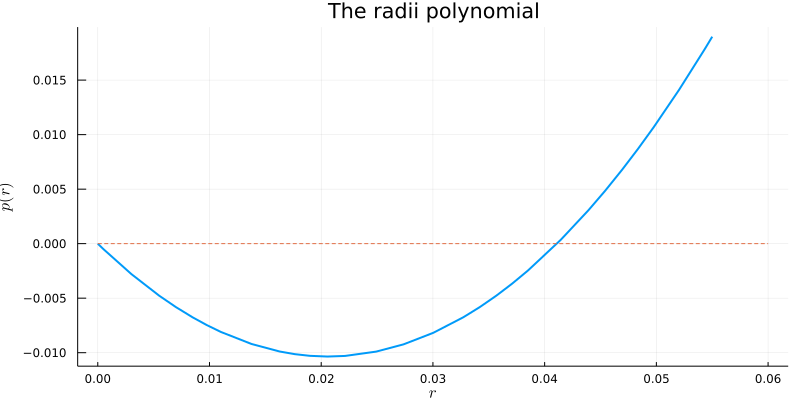

In [16]:
using Plots
plot(p_func,0,0.055,
    line       = 2,
    size       = (800,400),
    legend     = false,
    title="The radii polynomial",
    xlabel     = "\$r\$",
    ylabel     = "\$p\\,(r)\$", 
)
fzero(x) = 0
plot!(fzero,0,0.06,linestyle=:dash)
# savefig("radii-poly.pdf")


### 参考文献

1. 大石進一編著, 精度保証付き数値計算の基礎, コロナ社, 2018.<br>
(この本の6章にNewton-Kantorovichの定理とそれを使った精度保証方法が載っている)
1. J.-L. Figueras, M. Gameiro, J.-P. Lessard, and R. de la Llave. A framework for the numerical computation and a posteriori verification of invariant objects of evolution equations. SIAM Journal on Applied Dynamical Systems, 16(2):1070–1088, 2017.<br>
(Newton-Kantorovich型定理を使ったフレームワークの紹介と応用例のサーベイ)
1. J.-P. Lessard, J. B. van den Berg, Rigorous Numerics in Dynamics, Proceedings of Symposia in Applied Mathematics 74, American Mathematical Society, 2018.<br>
(力学系におけるNewton-Kantorovich型定理を使った精度保証付き数値計算の簡単な実践例をいくつか紹介している)


<div align="right">大谷俊輔, <a href="http://www.risk.tsukuba.ac.jp/~takitoshi/">高安亮紀</a>，2021年2月4日, 2022年2月21日（修正）</div>